In [1]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import shutil
import os
import IPython.display
import random
import math
import shutil


In [201]:
p = 0.3
q = 1.7

a = int(p*sr)
b = int(q*sr)
IPython.display.Audio(data=y[a:b], rate=sr)

sr:  16000
wav shape:  (33778,)
length:  2.111125 secs


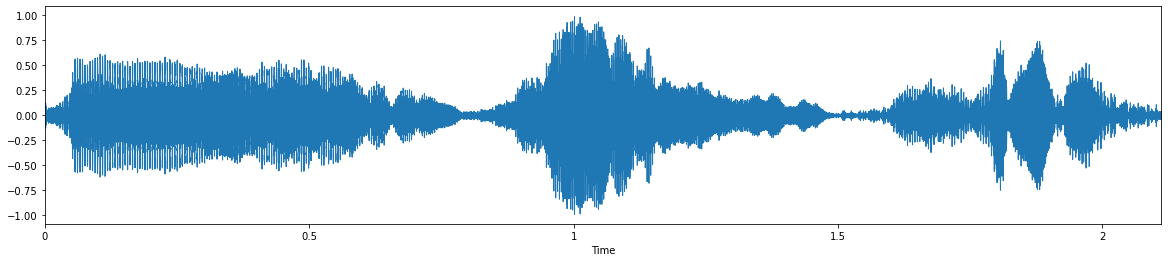

In [204]:
# sf.write('1120/다시/처리/해결/'+file, y[a:b], sr, subtype='PCM_16')
# shutil.move(wav, '1120/다시/처리/원본/'+file)
dir = '1120/다시/2초이상'
files = os.listdir(dir)
for f in files:
    file = f
    
wav = '1120/다시/2초이상/'+file
file_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=file_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')
fig = plt.figure(figsize=(20, 4) )
librosa.display.waveplot(y, sr=sr)

In [203]:
f

'0.9speed_X-1_20201104_한우진_32.wav'

In [48]:
dir = '1120/다시/augmentation/'
dir2 = '1120/다시/augmentation2/'
files = os.listdir(dir)

for f in files:
    wav = dir + f
    file_sr = librosa.get_samplerate(wav)
    y, sr = librosa.load(wav, sr=file_sr)
    new = y * (0.99/np.max(y))
    sf.write(dir2+f, new, sr, subtype='PCM_16') 

0.038482666


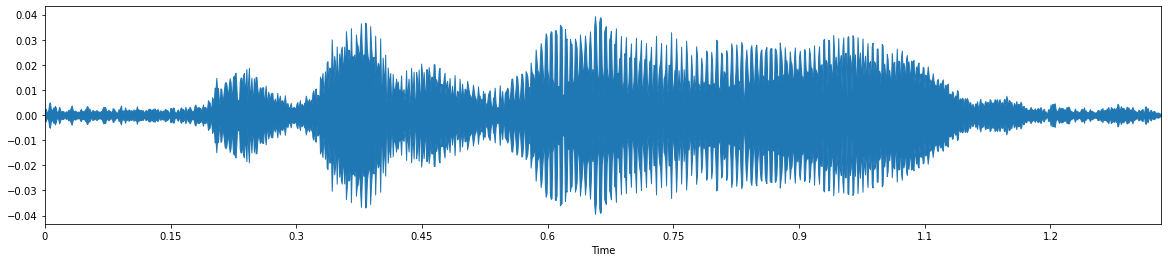

In [15]:
wav = '1120/다시/augmentation/0.9speed_X2_20201118_백종환_06.wav'
file_sr = librosa.get_samplerate(wav)
y, sr = librosa.load(wav, sr=file_sr)
fig = plt.figure(figsize=(20, 4) )
print(np.max(y))
librosa.display.waveplot(y, sr=sr)

In [21]:
IPython.display.Audio(data=y, rate=sr)

In [23]:
x = y*20

0.7696533


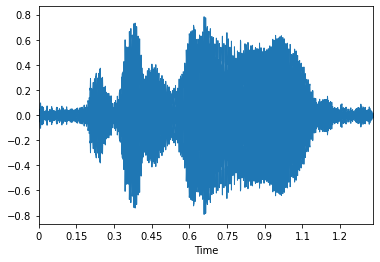

In [24]:
print(np.max(x))
librosa.display.waveplot(x, sr=sr)

In [25]:
IPython.display.Audio(data=x, rate=sr)

In [26]:
sf.write('sample.wav', x, sr, subtype='PCM_16')  

0.42053223


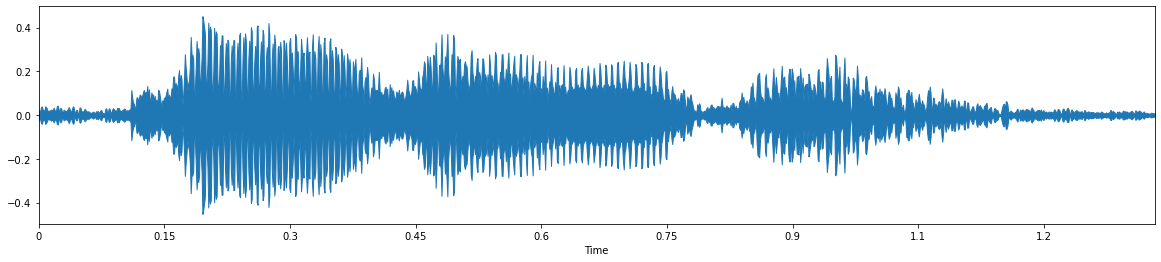

In [14]:
wav = '1120/다시/augmentation/0.9speed_X-2_20201118_박종혁_4.wav'
file_sr = librosa.get_samplerate(wav)
y, sr = librosa.load(wav, sr=file_sr)
fig = plt.figure(figsize=(20, 4) )
print(np.max(y))
librosa.display.waveplot(y, sr=sr)

In [26]:
myaudio = intro = AudioSegment.from_wav("1120/다시/한번에/2020.11.19_이태검_10.wav")

silence2 = silence.detect_silence(myaudio, min_silence_len=100, silence_thresh=-16)

silence2 = [((start/1000),(stop/1000)) for start,stop in silence2] #convert to sec
print (silence2)

[(0.0, 4.535)]


In [12]:
silence

[[0, 4535]]

In [27]:
IPython.display.Audio(data=y[:int(4.535*sr)], rate=sr)

In [ ]:

silence = [((start/1000),(stop/1000)) for start,stop in silence] #convert to sec
print (silence)

In [1029]:
def resampling(input_directory, output_directory, new_sr):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        resample = librosa.resample(y, sr, new_sr)
        sf.write(output_directory+file, resample, new_sr, subtype='PCM_16')   

In [1078]:
resampling('1120/다시/바깥 공간/', '1120/다시/바깥 공간2/', 16000)

In [1079]:
resampling('1120/다시/조용한 공간/', '1120/다시/조용한 공간2/', 16000)

In [1080]:
resampling('1120/다시/TV 앞/', '1120/다시/TV 앞2/', 16000)

In [1030]:
def make_final_data(input_directory, background_directory, output_directory, minimize, maximum, times):
    
    fire_filelist = os.listdir(input_directory)
    background_filelist = os.listdir(background_directory)
    
    fires = []
    
    file_name = []
    start_point = []
    end_point = []
    
    for f_file in fire_filelist:
        fires.append(f_file)

    count = len(fires)    
    
    add_list = random.sample(range(1,count),times)
    print(add_list)
    
    for add in add_list :
        k = 0 + add
        
        for b_file in background_filelist :
            background, background_sr = librosa.load(background_directory + b_file, sr=16000)
            new_audio = []
    
            if(k >= count) :
                k = 0
            
            file_name.append(fires[k])
            
            fire, fire_sr = librosa.load(input_directory + fires[k], sr=16000)
    
            ratio = np.random.uniform(minimize,maximum)
            ratio = np.trunc(ratio * 100) / 100
            kind = 0.8, 0.9
            ratio = np.random.choice(kind)
        
            startpoint = np.random.randint((len(background) - len(fire)-100))
            
            endpoint = startpoint + len(fire)
            
            start_point.append(round((startpoint / sr),2))
            end_point.append(round((endpoint / sr),2))
            
            for i in range(len(background)):
                if(i >= startpoint and i < endpoint):
                    new_audio.append((ratio*fire[i-startpoint])+((1-ratio)*background[i]))
                
                else :
                    new_audio.append((1-ratio)*background[i])
        
            sf.write(output_directory + fires[k], new_audio, 16000, subtype='PCM_16')
    
            k = k+1
    return file_name, start_point, end_point

In [1082]:
def make_final_data3(input_directory, background_directory, output_directory, minimize, maximum, times):
    
    fire_filelist = os.listdir(input_directory)
    background_filelist = os.listdir(background_directory)
    
    fires = []
    
    file_name = []
    start_point = []
    end_point = []
    
    for f_file in fire_filelist:
        fires.append(f_file)

    count = len(fires)    
    
    add_list = random.sample(range(1,count),times)
    print(add_list)
    
    for add in add_list :
        k = 0 + add
        
        for b_file in background_filelist :
            background, background_sr = librosa.load(background_directory + b_file, sr=16000)
            new_audio = []
    
            if(k >= count) :
                k = 0
            
            file_name.append(fires[k])
            
            fire, fire_sr = librosa.load(input_directory + fires[k], sr=16000)
    
            ratio = np.random.uniform(0.85,0.95)
            ratio = np.trunc(ratio * 100) / 100
        
            startpoint = np.random.randint((len(background) - len(fire)-100))
            
            endpoint = startpoint + len(fire)
            
            start_point.append(math.floor((startpoint / fire_sr)))
            end_point.append(math.ceil(endpoint / fire_sr))
            
            for i in range(len(background)):
                if(i >= startpoint and i < endpoint):
                    new_audio.append((ratio*fire[i-startpoint])+((1-ratio)*background[i]))
                
                else :
                    new_audio.append((1-ratio)*background[i])
        
            sf.write(output_directory + fires[k], new_audio, 16000, subtype='PCM_16')
    
            k = k+1
    return file_name, start_point, end_point

In [1088]:
def make_final_data4(input_directory, background_directory, output_directory, minimize, maximum, times):
    
    fire_filelist = os.listdir(input_directory)
    background_filelist = os.listdir(background_directory)
    
    fires = []
    
    file_name = []
    start_point = []
    end_point = []
    
    for f_file in fire_filelist:
        fires.append(f_file)

    count = len(fires)    
    
    add_list = random.sample(range(1,count),times)
    print(add_list)
    
    for add in add_list :
        k = 0 + add
        
        for b_file in background_filelist :
            background, background_sr = librosa.load(background_directory + b_file, sr=16000)
            new_audio = []
    
            if(k >= count) :
                k = 0
            
            file_name.append(fires[k])
            
            fire, fire_sr = librosa.load(input_directory + fires[k], sr=16000)
    
            ratio = 1
        
            startpoint = np.random.randint((len(background) - len(fire)-100))
            
            endpoint = startpoint + len(fire)
            
            start_point.append(math.floor((startpoint / fire_sr)))
            end_point.append(math.ceil(endpoint / fire_sr))
            
            for i in range(len(background)):
                if(i >= startpoint and i < endpoint):
                    new_audio.append((ratio*fire[i-startpoint])+((1-ratio)*background[i]))
                
                else :
                    new_audio.append((1-ratio)*background[i])
        
            sf.write(output_directory + fires[k], new_audio, 16000, subtype='PCM_16')
    
            k = k+1
    return file_name, start_point, end_point

In [996]:
file_name, start_point, end_point = make_final_data('1120/all/', '1120/background/', '1120/final/', 0.8, 1.01, 1)

[216]


In [1093]:
file_name, start_point, end_point = make_final_data3('1120/다시/TV 앞2/', '1120/background/', '1120/다시/TV 앞3/', 0.8, 1.01, 1)

[212]


In [1094]:
f = file_name
s = start_point
e = end_point

In [1095]:
file_name, start_point, end_point = make_final_data4('1120/다시/조용한 공간2/', '1120/background/', '1120/다시/조용한 공간3/', 0.8, 1.01, 1)

[163]


In [1096]:
f2 = file_name
s2 = start_point
e2 = end_point

In [1097]:
file_name, start_point, end_point = make_final_data4('1120/다시/바깥 공간2/', '1120/background/', '1120/다시/바깥 공간3/', 0.8, 1.01, 1)

[318]


In [1098]:
f3 = file_name
s3 = start_point
e3 = end_point

In [1099]:
def add_noise(input_directory, output_directory, percent):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        #random_state = 42
        #rnd_state = np.random.RandomState(random_state)
        
        data = np.c_[y]
        mu = np.mean(data)
        sd = np.std(data)
        
        data_df = pd.DataFrame(data, columns=['Value'])
        data_df['Index'] = data_df.index.values
        
        ratio = np.random.uniform(0.05, percent)
        
        jitter = ratio*np.random.normal(mu, sd, size=data_df.shape[0])
        data_df['with_jitter'] = data_df['Value'] + jitter
        
        sf.write(output_directory +file, data_df['with_jitter'], sr, subtype='PCM_16')

In [1100]:
add_noise('1120/다시/바깥 공간3/', '1120/다시/바깥 공간4/', 0.1)

In [1102]:
df = pd.DataFrame(f)
df.to_excel('1120/다시/f.xlsx')

df = pd.DataFrame(s)
df.to_excel('1120/다시/s.xlsx')

df = pd.DataFrame(e)
df.to_excel('1120/다시/e.xlsx')

df = pd.DataFrame(f2)
df.to_excel('1120/다시/f2.xlsx')

df = pd.DataFrame(s2)
df.to_excel('1120/다시/s2.xlsx')

df = pd.DataFrame(e2)
df.to_excel('1120/다시/e2.xlsx')

df = pd.DataFrame(f3)
df.to_excel('1120/다시/f3.xlsx')

df = pd.DataFrame(s3)
df.to_excel('1120/다시/s3.xlsx')

df = pd.DataFrame(e3)
df.to_excel('1120/다시/e3.xlsx')



In [2]:
def Both(input_directory, output_directory):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        T_ratio = np.random.uniform(0.9,1.11)
        T_ratio = np.trunc(T_ratio * 10) / 10
        P_ratio = np.random.randint(-2,3)
        new_audio = librosa.effects.time_stretch(y,T_ratio)
        new_audio = librosa.effects.pitch_shift(new_audio,sr,n_steps=P_ratio)
        
        sf.write(output_directory+ str(T_ratio) + "speed_" + "X"+str(P_ratio) + "_" + file, new_audio, sr, subtype='PCM_16')   

In [7]:
Both('1120/다시/한번에/', '1120/다시/augmentation/')

In [1015]:
sr = make_final_data2('1120/all/', '1120/background/', '1120/final/', 0.5, 1.01, 1)

[216]


In [1018]:
for i in sr:
    if(i == 16000):
        sum = sum+

In [ ]:
str(startpoint/fire_sr)

In [ ]:
s2 = s

In [1007]:
import pandas as pd
import numpy as np

df = pd.DataFrame.from_records(str(s))
df.to_excel('test2.xlsx')

In [1068]:
df = pd.DataFrame(e3)
df.to_excel('e3.xlsx')

In [2]:
def decibel_normalization(input_directory, output_directory, decibel):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        new_audio = []
        y, sr = load(input_directory+file)
        max_mine = np.max(y)
        ratio = decibel / max_mine
        for i in range(len(y)):
            new_audio.append(y[i] * ratio)
        sf.write(output_directory+file, new_audio, sr, subtype='PCM_16')   

In [ ]:
decibel_normalization('normalization_time/non/', 'normalization_decibel/non/', 0.72091675)

In [ ]:
file_name, start_point, end_point

In [905]:
import os
from os import rename

dir = '1120/a/'
files = os.listdir(dir)
for f in files:
    rename(dir+f, dir+f.replace('mj', '20201104_홍민재_'))

In [3]:
def load(file_name):
    wav = file_name
    file_sr = librosa.get_samplerate(wav)

    y, sr = librosa.load(wav, sr=file_sr)
    return y, sr

In [920]:
y, sr = load('1120/split2/백종환/201118_백종환_02.wav')
new_audio = librosa.effects.pitch_shift(y,sr,n_steps=7)
sf.write('1120/20201120_백종환2_1.wav', new_audio, sr, subtype='PCM_16')   

In [993]:
wav = '1120/all/2020.11.19_이태검_30.wav'
file_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=file_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')
IPython.display.Audio(data=y[:200000], rate=sr)


sr:  44100
wav shape:  (241664,)
length:  5.479909297052155 secs


In [ ]:
fig = plt.figure(figsize=(20, 4) )
librosa.display.waveplot(y, sr=sr)

In [994]:
sf.write('1120/all/2020.11.19_이태검_30.wav', y[:200000], sr, subtype='PCM_16')

In [ ]:
def Both(input_directory, output_directory):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        T_ratio = np.random.uniform(0.9,1.11)
        T_ratio = np.trunc(T_ratio * 10) / 10
        P_ratio = np.random.randint(-2,3)
        new_audio = librosa.effects.time_stretch(y,T_ratio)
        new_audio = librosa.effects.pitch_shift(new_audio,sr,n_steps=P_ratio)
        
        sf.write(output_directory+ str(T_ratio) + "speed_" + "X"+str(P_ratio) + "_" + file, new_audio, sr, subtype='PCM_16')   

In [942]:
dir1 = '1120/다시/한번에'
dir2 = ''
files = os.listdir(dir1)
for f in files:
    files2 = os.listdir(dir1+f)
    for f2 in files2:
#         print(dir1+f+'/'+f2)
#         print(f2[:-4])
#         print(int(f2.split('_')[-1][:-4])+10)
#         print(dir1+f+'/'+ f2.split('_')[0] + "_" + f2.split('_')[1] +'_' + str(int(f2.split('_')[-1][:-4])+10) + "_.wav")
        y, sr = load(dir1+f+'/'+f2)
        new_audio = librosa.effects.pitch_shift(y,sr,n_steps=10)
        
        sf.write(dir1+f+'/'+ "20201120_" + f2.split('_')[1] +'2_' + str(int(f2.split('_')[-1][:-4])) + ".wav", new_audio, sr, subtype='PCM_16')

In [946]:
a = [1,2,3,4,5]
b = [6,7,8,9,10]
for i in a:
    for k in b:
        print(k)
        break;

6
6
6
6
6


In [1074]:
dir1 = '1120/다시/한번에/'
dir2 = '1120/다시/조용한 공간/'
files = os.listdir(dir1)
sum = 0
for f in files:
    y, sr = load(dir1+f)
    new_audio = librosa.effects.pitch_shift(y,sr,n_steps=+1)

    sf.write(dir2+ f.split('_')[0] + "_" + f.split('_')[1] +'_' + str(int(f.split('_')[-1][:-4])+10) + ".wav", new_audio, sr, subtype='PCM_16')

In [1075]:
dir1 = '1120/다시/한번에/'
dir2 = '1120/다시/바깥 공간/'
files = os.listdir(dir1)
sum = 0
for f in files:
    y, sr = load(dir1+f)
    new_audio = librosa.effects.pitch_shift(y,sr,n_steps=-1)

    sf.write(dir2+ f.split('_')[0] + "_" + f.split('_')[1] +'_' + str(int(f.split('_')[-1][:-4])+20) + ".wav", new_audio, sr, subtype='PCM_16')

In [ ]:
import shutil

shutil.copyfile("./test1/test1.txt", "./test2.txt")

shutil.copy("./test1/test1.txt", "./test3.txt")

shutil.copy2("./test1/test1.txt", "./test4.txt")

In [1070]:
dir1 = '1120/다시/전체/'
dir2 = '1120/다시/한번에/'
files = os.listdir(dir1)
for f in files:
    files2 = os.listdir(dir1+f)
    for f2 in files2:
        shutil.copy2(dir1+f+'/'+f2, dir2+f2)

In [820]:
wav = '1120/20201118_천은경_5.wav'
file_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=file_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')
IPython.display.Audio(data=y[30000:], rate=sr)

sr:  44100
wav shape:  (62052,)
length:  1.4070748299319729 secs


In [898]:
sf.write("1120/20201118_백찬우_10.wav", y[int(sr*9):int(sr*10)], sr, subtype='PCM_24')

In [865]:
wav = '1120/original/2020.11.18-백찬우-10회.wav'
file_sr = librosa.get_samplerate(wav)

y, sr = librosa.load(wav, sr=file_sr)
print('sr: ', sr)
print('wav shape: ', y.shape)
print('length: ', y.shape[0]/float(sr), 'secs')
IPython.display.Audio(data=y[:-16000], rate=sr)

sr:  44100
wav shape:  (465920,)
length:  10.565079365079365 secs


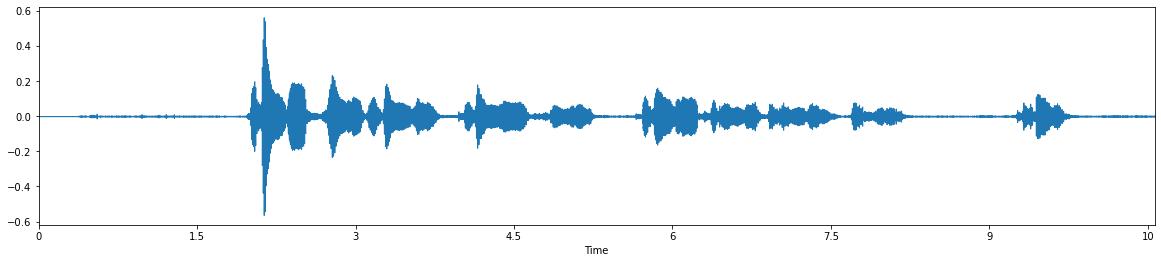

In [866]:
fig = plt.figure(figsize=(20, 4) )
librosa.display.waveplot(y, sr=sr)

In [867]:
start = []
end = []
first = True
con = 0

for time in range (len(y)):
    if(abs(y[time]) > 0.01):
        if(first):
            first = False
            start_time = time
        else:
            end_time = time
    else:
        con = con + 1
        if(con > 15000):
            con = 0
            if(not first) :
                start.append(start_time)
                end.append(end_time)
                first = True
print(len(start))
print(len(end))

16
16


In [868]:
i = 5
IPython.display.Audio(data=y[start[i]-2400:end[i]+2400], rate=sr)

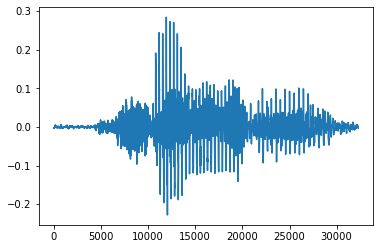

In [713]:
print(plt.plot(y[start[i]-4800:end[i]+2400]))

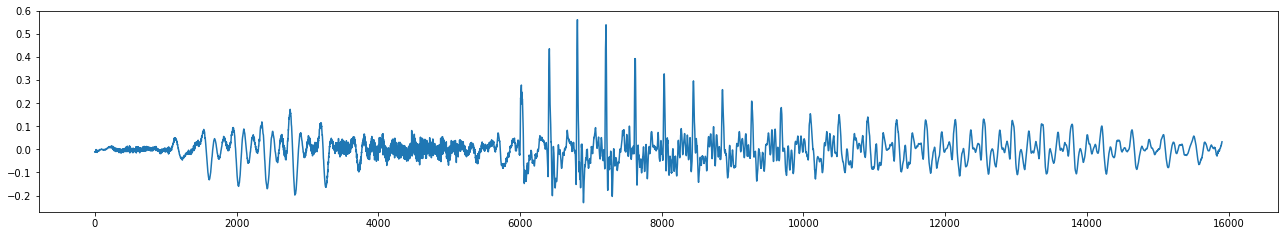

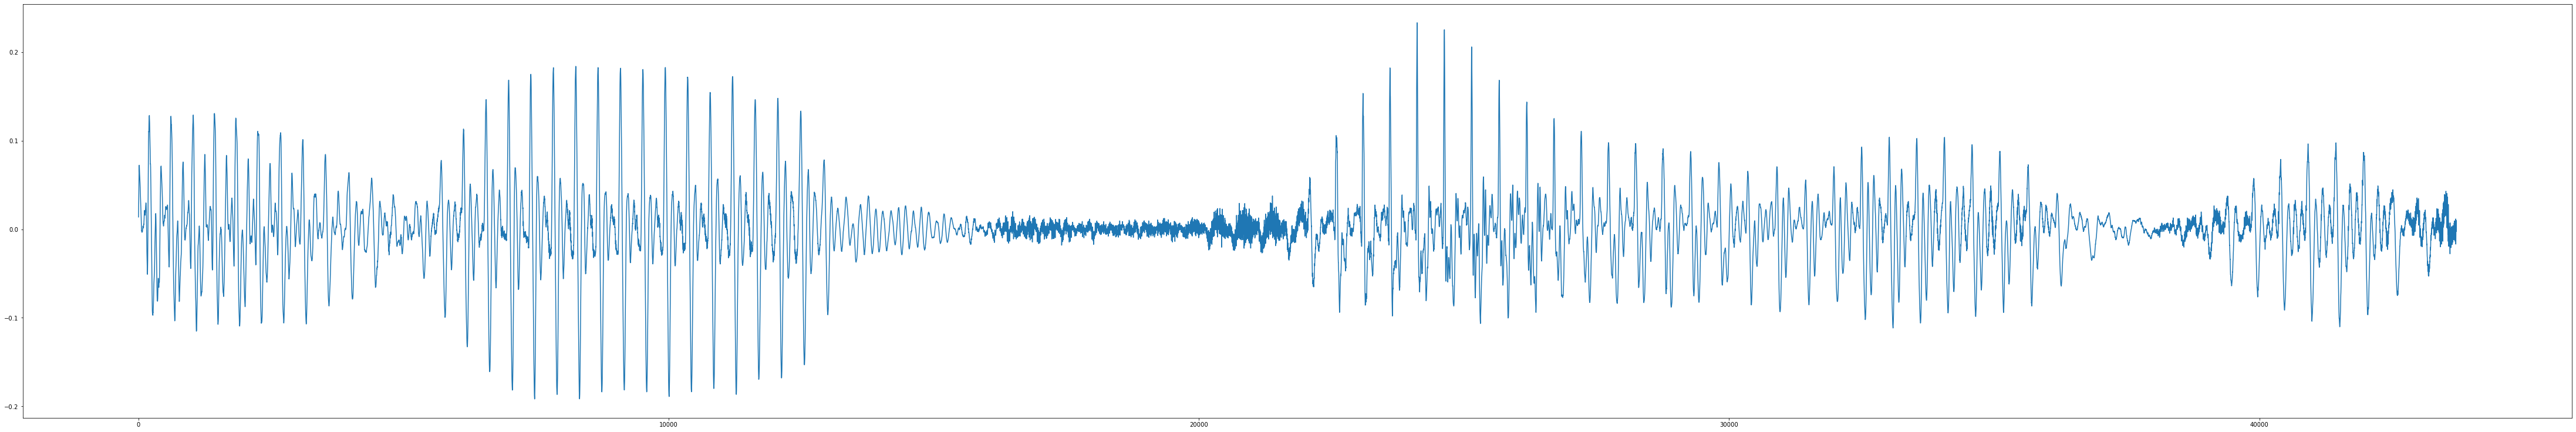

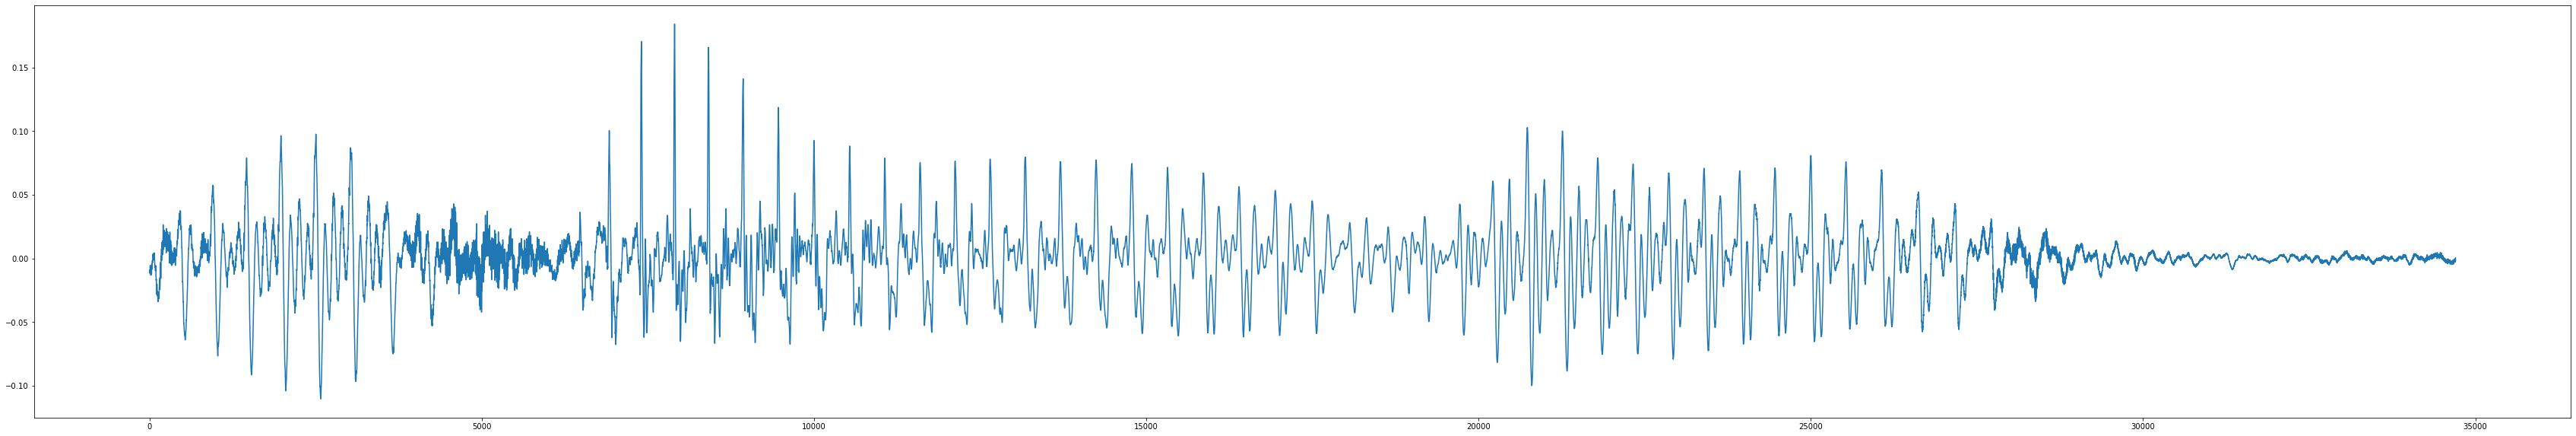

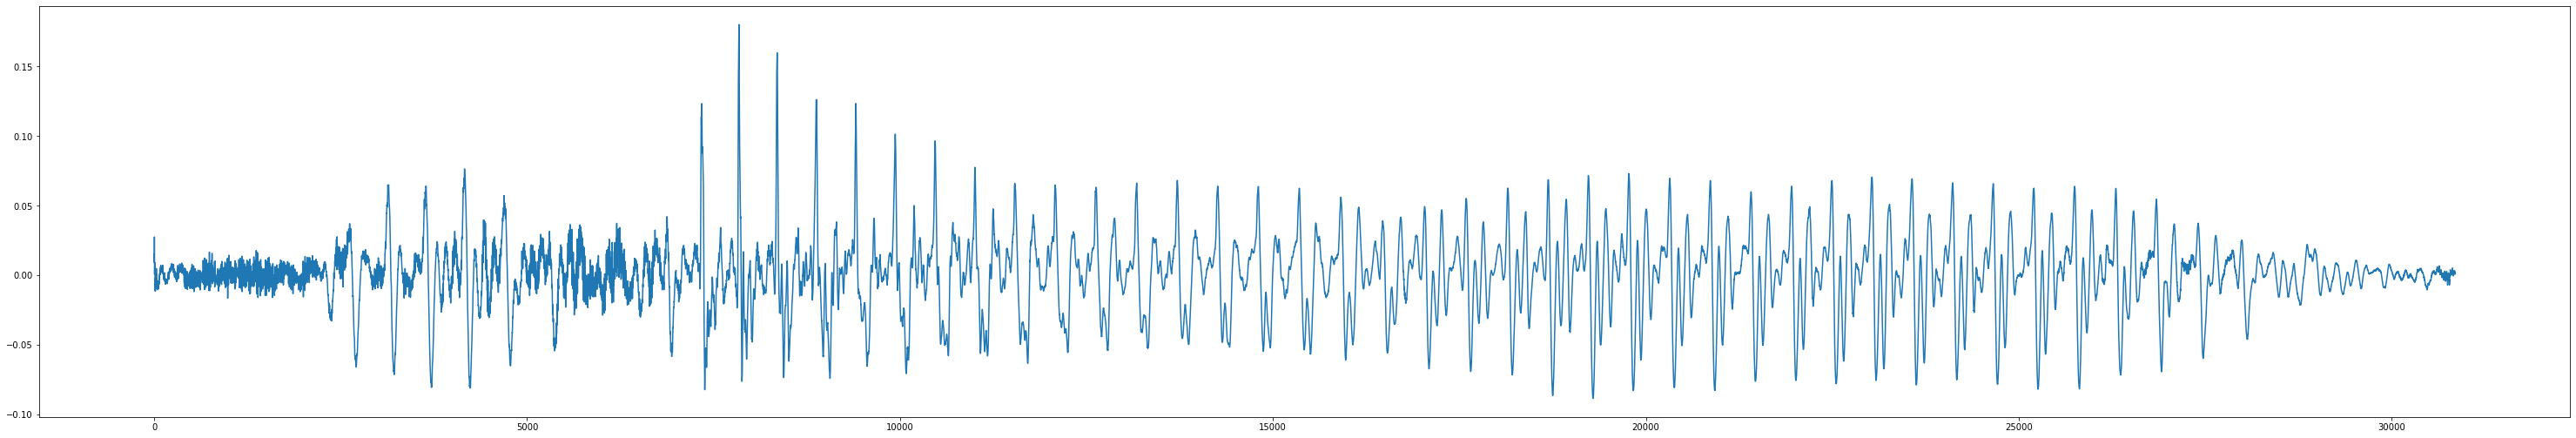

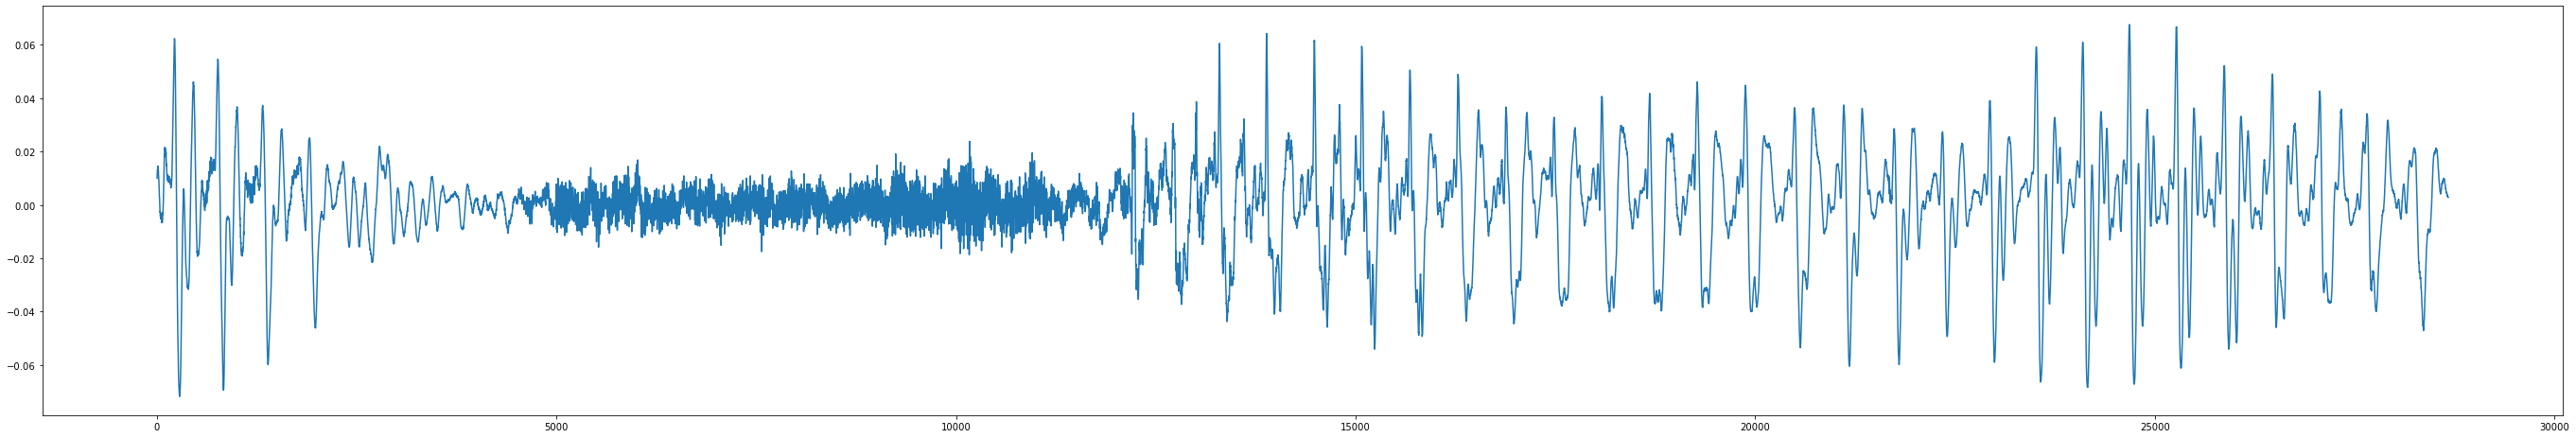

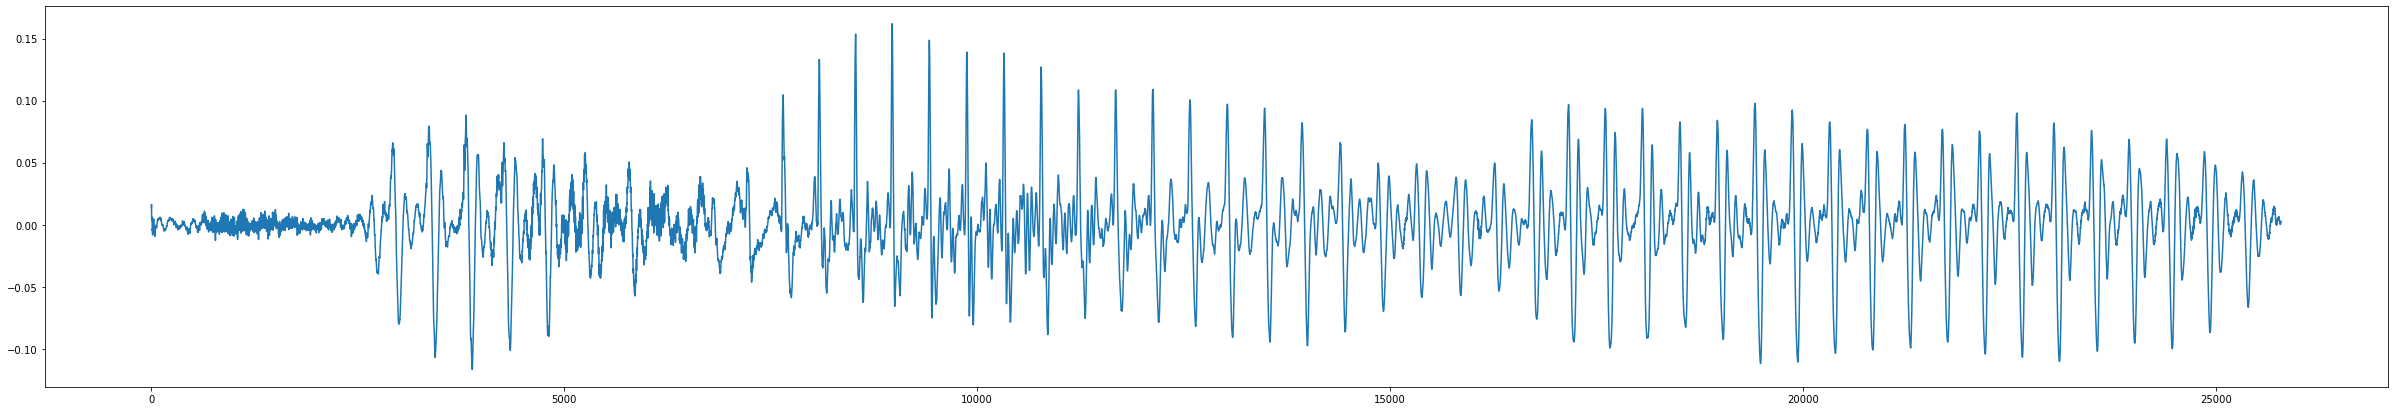

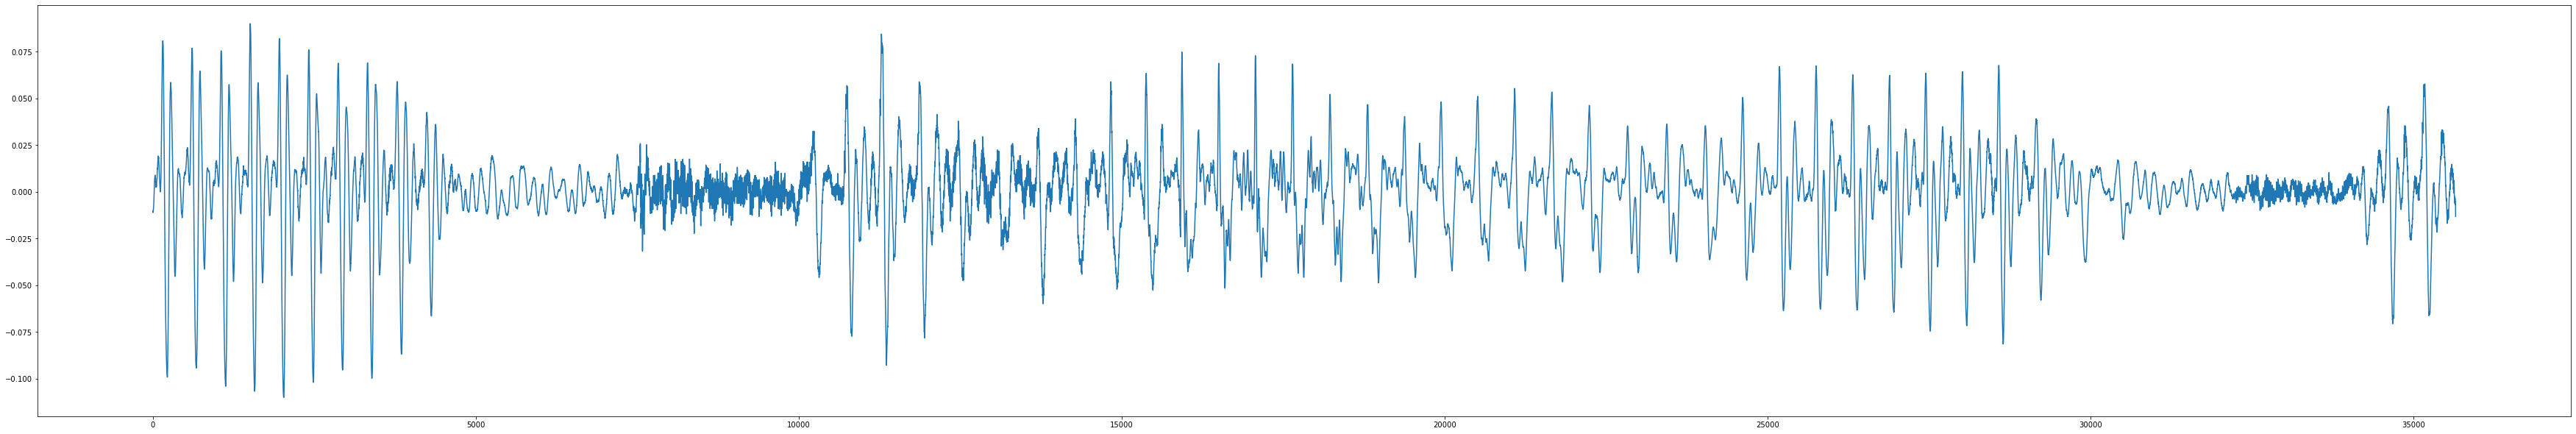

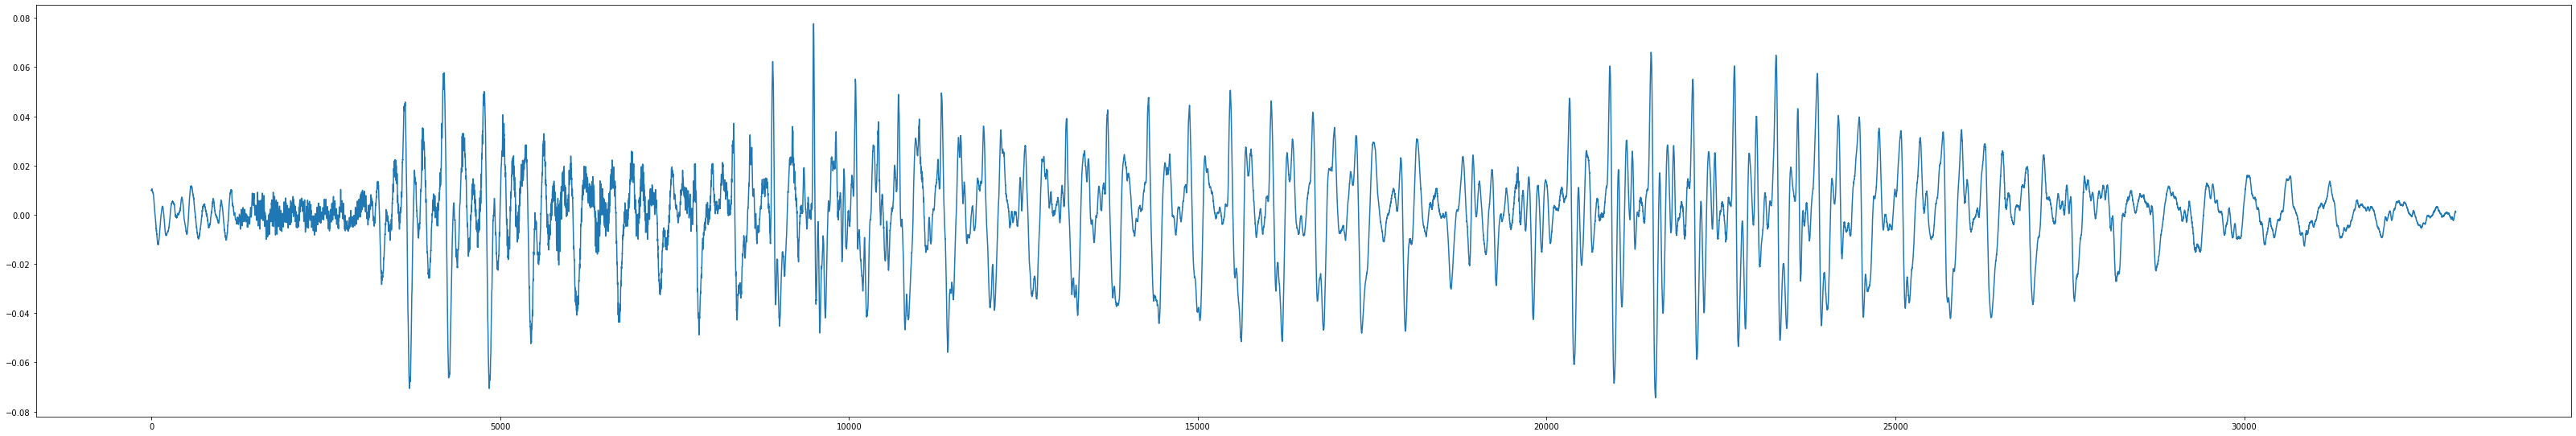

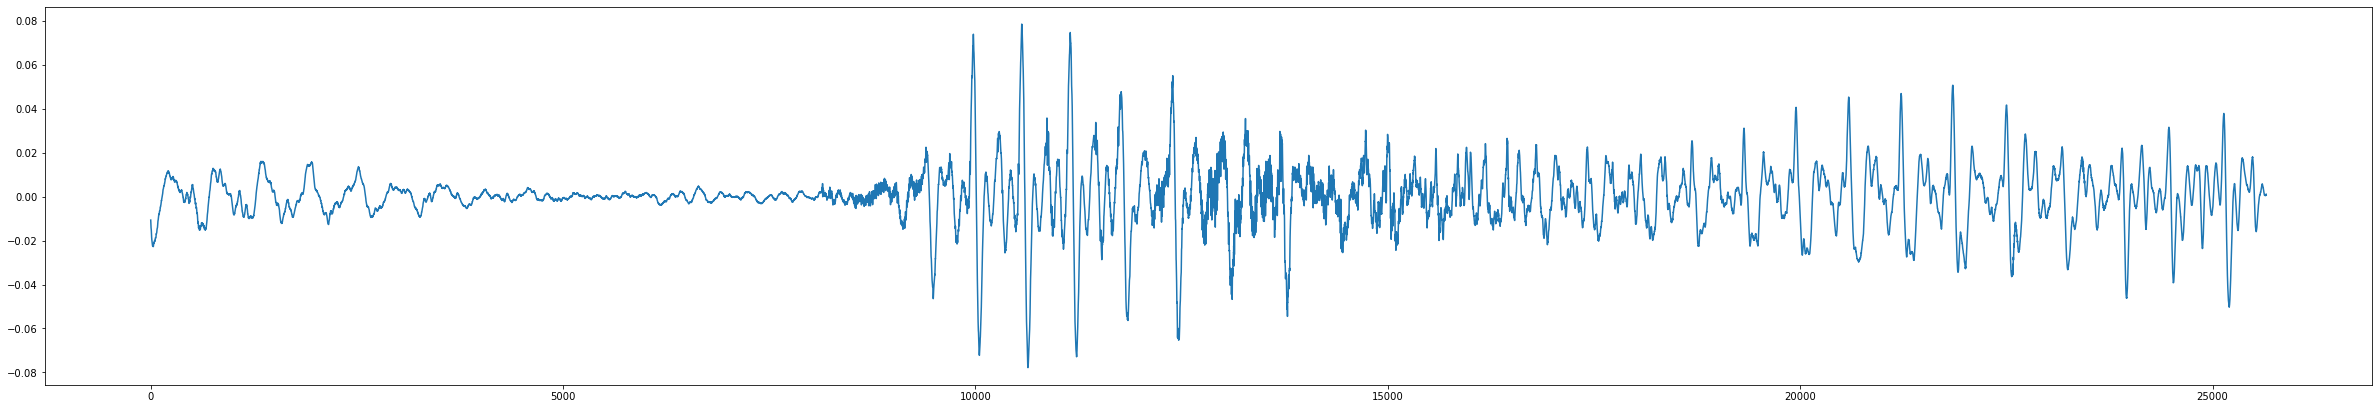

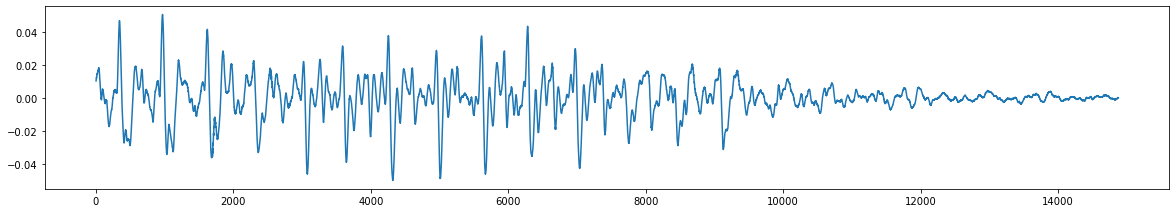

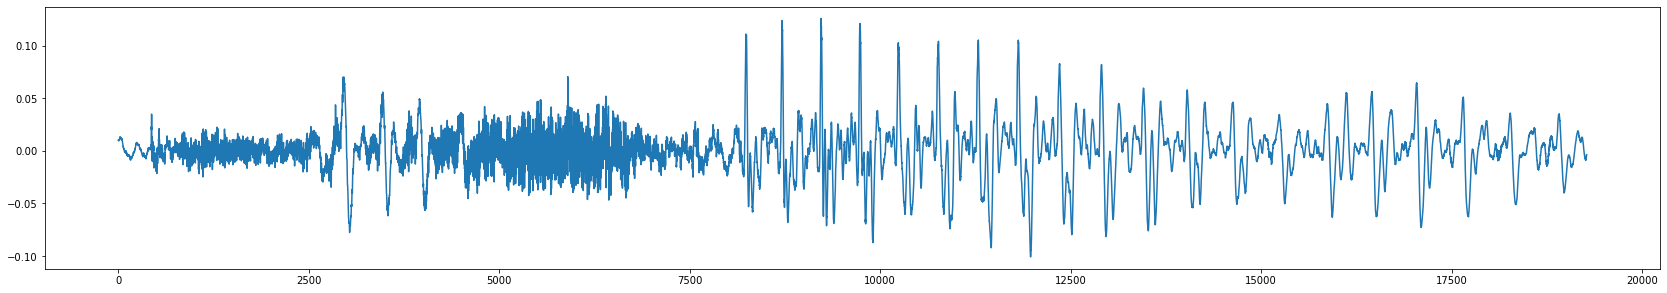

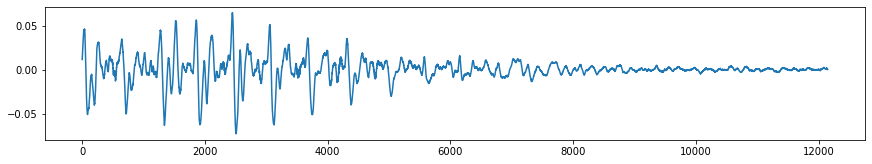

In [869]:
for i in range(len(start)):
    height = (end[i]-start[i])/3000
    width = (end[i]-start[i])/500
    if(height > 2) :
        fig = plt.figure(figsize=(width, height) )
        print(plt.plot(y[start[i]:end[i]+4800]))
        #plt.savefig("figure/fire_" + str(i+17) +'.png')
        
        sf.write("1120/20201118_백찬우_" + str(i+1) + ".wav", y[start[i]-2400:end[i]+2400], sr, subtype='PCM_24')

In [859]:
i = 12-1

In [857]:
IPython.display.Audio(data=y[start[i]:end[i+1]], rate=sr)

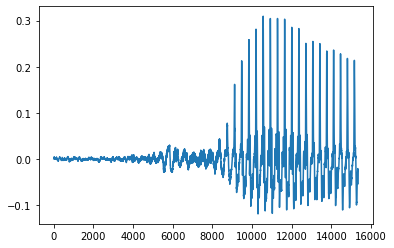

In [632]:
print(plt.plot(y[start[i]-4800:end[i]+2400]))

In [864]:
sf.write("1120/20201118_최지원_8.wav", y[start[i]:end[i]+14400], sr, subtype='PCM_24')

In [107]:
start[40]

749010

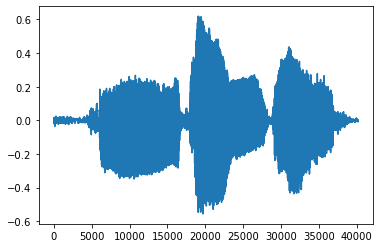

In [45]:
print(plt.plot(y[start[45]-4800:end[45]+12000]))
IPython.display.Audio(data=y[start[45]-4800:end[45]+12000], rate=sr)

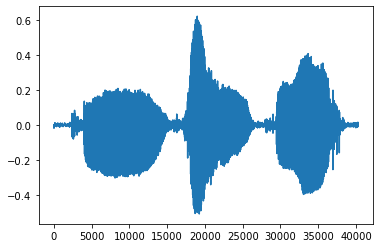

In [43]:
print(plt.plot(y[start[43]-2400:end[44]+2400]))
IPython.display.Audio(data=y[start[43]-2400:end[44]+2400], rate=sr)

In [46]:
sf.write("wj46.wav", y[start[45]-4800:end[45]+12000], sr, subtype='PCM_24')

In [ ]:
sf.write("dj" + str(i+1) + ".wav", y[start[i]-1200:end[i]+9600], sr, subtype='PCM_24')

In [440]:
for i in range (len(start)):
    print(i+1, (start[i]-4800)/sr, (end[i]-start[i])/sr)

1 1.17325 0.78875
2 3.088375 0.8085625
3 5.10275 0.800625
4 7.06225 0.1105625
5 7.2134375 0.6039375
6 8.9465625 0.7750625
7 10.9468125 0.73975
8 12.873 0.55975
9 13.4373125 1.12625
10 15.028875 0.7156875
11 16.8740625 0.6675
12 18.9433125 0.605875
13 20.7373125 0.1139375
14 20.8514375 0.5748125
15 22.595875 0.7284375
16 24.506375 0.718875
17 26.3394375 0.75225
18 28.233 0.345375
19 28.5785625 0.4015625
20 30.1609375 0.7965625
21 31.977125 0.7698125
22 33.1825625 1.3655625
23 35.3225625 0.61375
24 35.9370625 0.6399375
25 37.9009375 0.668875
26 39.633 0.7741875
27 41.6450625 0.5993125
28 43.46775 0.0909375
29 43.562375 0.678
30 45.2255625 0.8475625
31 47.1963125 0.77475
32 49.1348125 0.7063125
33 50.9923125 0.735375
34 52.9036875 0.5591875
35 53.4649375 1.30225
36 54.783 0.658
37 56.5123125 0.700875
38 58.4358125 0.6640625
39 60.182 0.705375
40 62.228375 0.355375


1120/a/20201118_고건호_1.wav


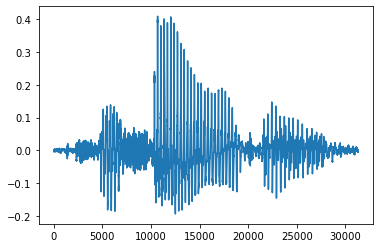

1120/a/20201118_고건호_10.wav


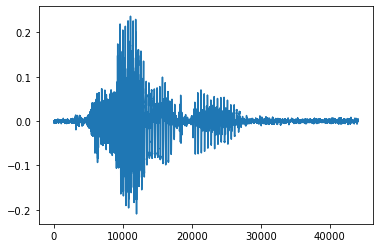

1120/a/20201118_고건호_11.wav


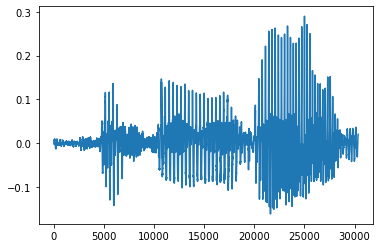

1120/a/20201118_고건호_2.wav


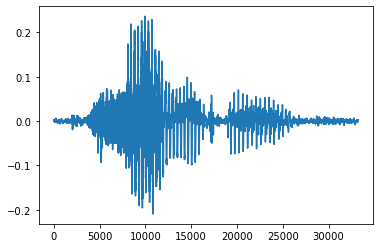

1120/a/20201118_고건호_3.wav


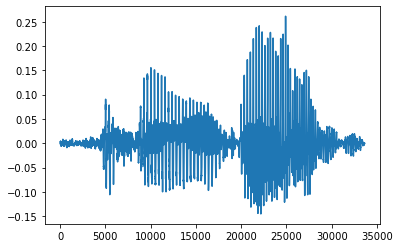

1120/a/20201118_고건호_4.wav


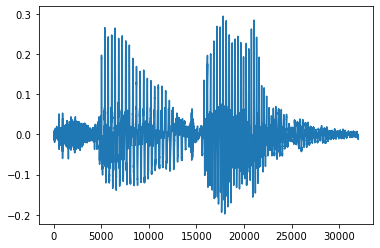

1120/a/20201118_고건호_5.wav


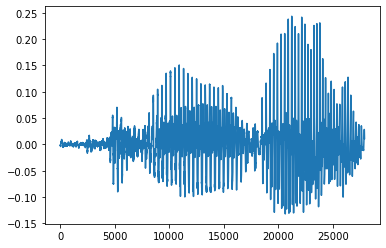

1120/a/20201118_고건호_6.wav


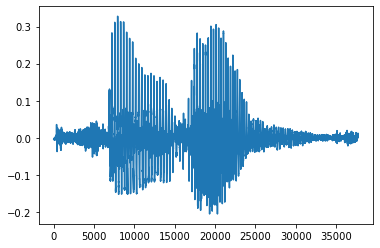

1120/a/20201118_고건호_7.wav


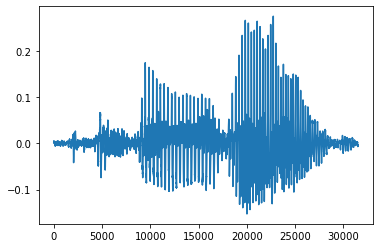

1120/a/20201118_고건호_8.wav


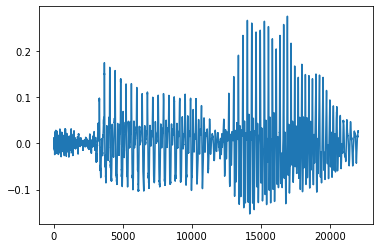

1120/a/20201118_고건호_9.wav


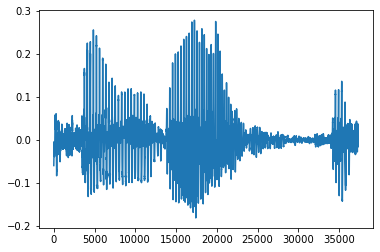

In [608]:
path_in = '1120/a/'
for file in os.listdir(path_in):
    wav = path_in+file
    file_sr = librosa.get_samplerate(wav)

    y, sr = librosa.load(wav, sr=file_sr)
    print(wav)
    print(plt.plot(y))
    plt.show()